In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np

In [3]:
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [8]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
telecom.shape

(7043, 21)

In [10]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [12]:
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})
telecom[varlist] = telecom[varlist].apply(binary_map)

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [14]:
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first= True)
telecom= pd.concat([telecom,dummy1],axis= 1)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [16]:
telecom['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [17]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [19]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [20]:
#telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric = True)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors= 'coerce')


In [21]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [22]:
num_telecom = telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen','TotalCharges']]

In [23]:
num_telecom.describe(percentiles= [.25,.5,.75,.90,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
99%,72.000000,114.729000,1.000000,8039.883000
max,72.000000,118.750000,1.000000,8684.800000


In [24]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

11 is a very small percentage in the whole data points

In [25]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [26]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = telecom.drop(['Churn', 'customerID'], axis= 1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [29]:
Y = telecom['Churn']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size= 0.7, random_state= 50)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
1675,-0.133618,1,1,0.475385,0.049524,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
4154,-1.069656,1,1,0.342984,-0.794873,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5542,1.412879,1,0,0.715361,1.593201,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
3039,1.616366,0,1,-0.002912,1.045038,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
3671,-1.273143,1,1,0.349604,-0.968971,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [33]:
churn = (sum(telecom['Churn']))/ len(telecom['Churn'].index) *100
churn

26.578498293515356

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

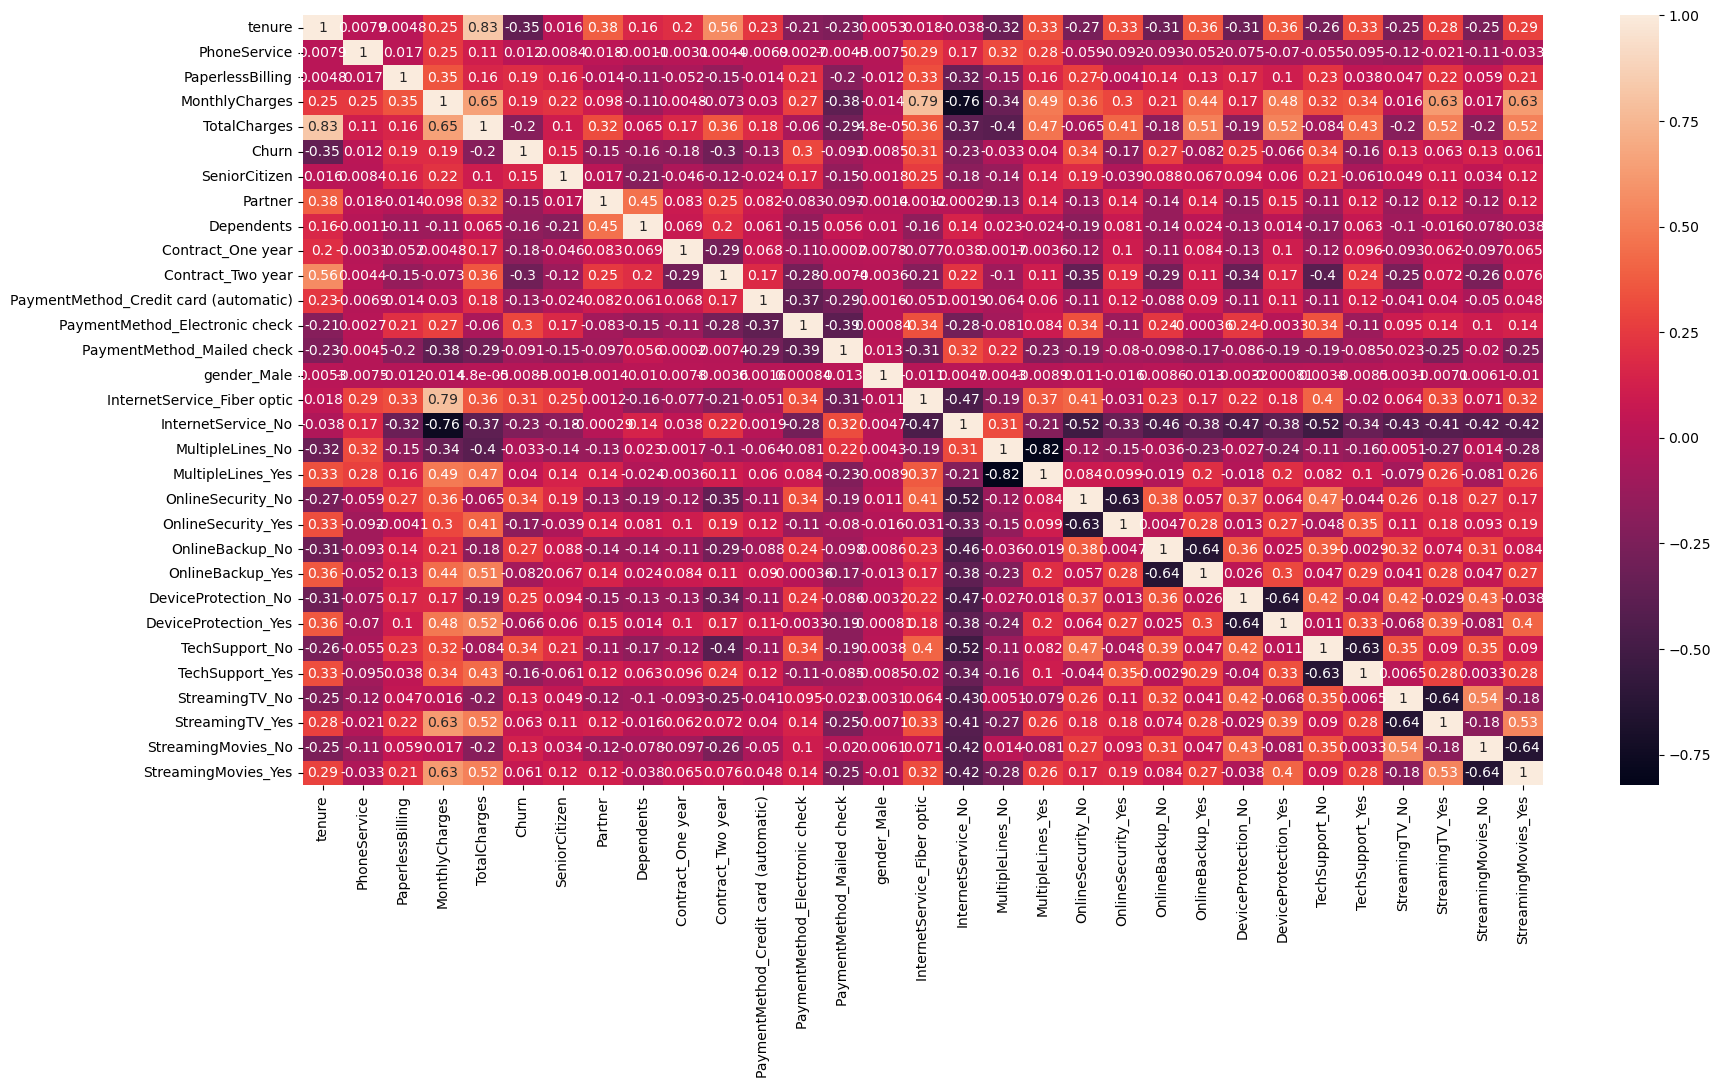

In [35]:
plt.figure(figsize= (20,10))
sns.heatmap(telecom.corr(), annot= True)
plt.show()

In [36]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

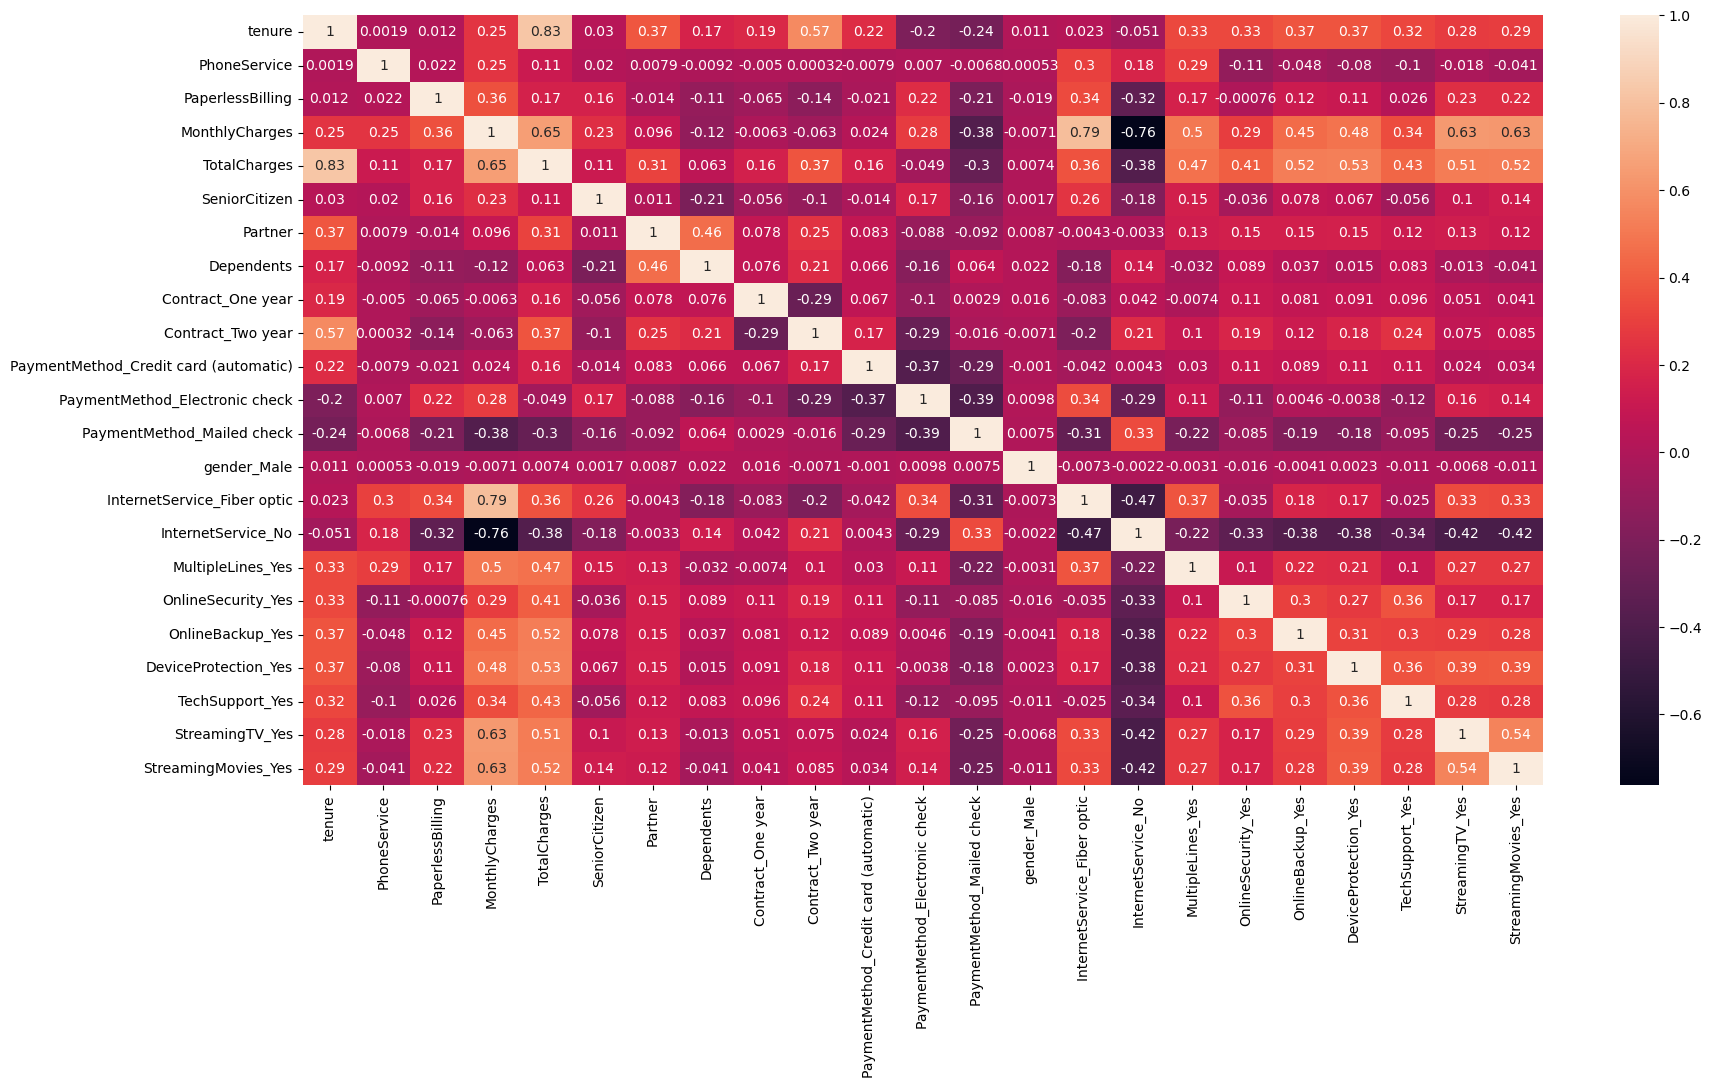

In [37]:
plt.figure(figsize= (20,10))
sns.heatmap(X_train.corr(), annot= True)
plt.show()

In [38]:
import statsmodels.api as sm

In [39]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.4
Date:                Wed, 14 Jun 2023   Deviance:                       4060.8
Time:                        16:26:12   Pearson chi2:                 5.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2867
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.1507      1.517     -2.077      0.038      -6.124      -0.178
tenure                                   -1.5917      0.188     -8.487      0.000      -1.959      -1.224
PhoneService                              0.4689      0.777      0.603      0.546      -1.054       1.992
PaperlessBilling                          0.4339      0.089      4.856      0.000       0.259       0.609
MonthlyCharges                           -1.5937      1.151     -1.384      0.166      -3.850       0.663
TotalCharges                              0.8727      0.196      4.458      0.000       0.489       1.256
SeniorCitizen                             0.1466      0.102      1.444      0.149      -0.052       0.346
Partner                                  -0.0136      0.094     -0.145      0.884      -0.198       0.170
Dependents                               -0.0988      0.110     -0.899      0.369      -0.314       0.117
Contract_One year                        -0.7284      0.130     -5.595      0.000      -0.984      -0.473
Contract_Two year                        -1.4616      0.213     -6.857      0.000      -1.879      -1.044
PaymentMethod_Credit card (automatic)    -0.2242      0.139     -1.614      0.107      -0.497       0.048
PaymentMethod_Electronic check            0.2512      0.114      2.202      0.028       0.028       0.475
PaymentMethod_Mailed check               -0.0316      0.137     -0.230      0.818      -0.301       0.238
gender_Male                               0.0552      0.078      0.710      0.478      -0.097       0.207
InternetService_Fiber optic               1.9678      0.960      2.050      0.040       0.087       3.849
InternetService_No                       -2.1657      0.968     -2.238      0.025      -4.062      -0.269
MultipleLines_Yes                         0.4647      0.212      2.193      0.028       0.049       0.880
OnlineSecurity_Yes                       -0.2008      0.214     -0.936      0.349      -0.621       0.220
OnlineBackup_Yes                          0.1377      0.210      0.655      0.513      -0.274       0.550
DeviceProtection_Yes                      0.2237      0.212      1.055      0.291      -0.192       0.639
TechSupport_Yes                          -0.1607      0.216     -0.746      0.456      -0.583       0.262
StreamingTV_Yes                           0.7059      0.390      1.808      0.071      -0.059       1.471
StreamingMovies_Yes                       0.7511      0.392      1.917      0.055      -0.017       1.519
=========================================================================================================
"""

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [41]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15 )             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [42]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True])

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', False, 3),
 ('Partner', False, 9),
 ('Dependents', False, 4),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 2),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 7),
 ('gender_Male', False, 6),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 8),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]

In [45]:
X_train.columns[~rfe.support_]

Index(['SeniorCitizen', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [46]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm,family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.6
Date:                Wed, 14 Jun 2023   Deviance:                       4069.1
Time:                        16:26:13   Pearson chi2:                 5.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2855
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.9389      0.478     -4.052      0.000      -2.877      -1.001
tenure                            -1.6183      0.184     -8.794      0.000      -1.979      -1.258
PhoneService                      -0.1717      0.289     -0.593      0.553      -0.739       0.396
PaperlessBilling                   0.4349      0.089      4.888      0.000       0.260       0.609
MonthlyCharges                    -0.6448      0.384     -1.678      0.093      -1.398       0.108
TotalCharges                       0.9052      0.194      4.662      0.000       0.525       1.286
Contract_One year                 -0.7513      0.129     -5.820      0.000      -1.004      -0.498
Contract_Two year                 -1.4895      0.212     -7.035      0.000      -1.905      -1.075
PaymentMethod_Electronic check     0.3428      0.083      4.137      0.000       0.180       0.505
InternetService_Fiber optic        1.1852      0.333      3.557      0.000       0.532       1.838
InternetService_No                -1.3873      0.377     -3.683      0.000      -2.126      -0.649
MultipleLines_Yes                  0.3184      0.115      2.780      0.005       0.094       0.543
OnlineSecurity_Yes                -0.3713      0.119     -3.131      0.002      -0.604      -0.139
TechSupport_Yes                   -0.3276      0.123     -2.663      0.008      -0.569      -0.087
StreamingTV_Yes                    0.3911      0.161      2.425      0.015       0.075       0.707
StreamingMovies_Yes                0.4488      0.161      2.795      0.005       0.134       0.764
==================================================================================================
"""

In [47]:
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

1675    0.549324
4154    0.723349
5542    0.016705
3039    0.010764
3671    0.755578
dtype: float64

In [48]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.54932413, 0.72334851, 0.01670511, 0.01076413, 0.75557847,
       0.64092743, 0.53118115, 0.73313396, 0.68947556, 0.279076  ])

In [49]:
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.549324,1675
1,1,0.723349,4154
2,0,0.016705,5542
3,0,0.010764,3039
4,1,0.755578,3671


In [50]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
0,1,0.549324,1675,1
1,1,0.723349,4154,1
2,0,0.016705,5542,0
3,0,0.010764,3039,0
4,1,0.755578,3671,1


the logistic regression curve gives you the probabilities of churning and not churning.

In [51]:
from sklearn import metrics

In [52]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)
print(confusion)

[[3206  396]
 [ 580  740]]


In [53]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8017066233238521


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif =pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,13.85
4,TotalCharges,10.25
1,PhoneService,8.55
0,tenure,6.98
8,InternetService_Fiber optic,6.68
9,InternetService_No,6.39
6,Contract_Two year,3.36
2,PaperlessBilling,2.92
13,StreamingTV_Yes,2.91
14,StreamingMovies_Yes,2.85


In [56]:
col = col.drop(['MonthlyCharges','PhoneService'])
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [57]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.8
Date:                Wed, 14 Jun 2023   Deviance:                       4085.6
Time:                        16:26:13   Pearson chi2:                 5.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2831
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5766      0.129    -12.239      0.000      -1.829      -1.324
tenure                            -1.4471      0.179     -8.103      0.000      -1.797      -1.097
PaperlessBilling                   0.4377      0.089      4.937      0.000       0.264       0.611
TotalCharges                       0.6999      0.186      3.766      0.000       0.336       1.064
Contract_One year                 -0.7766      0.129     -6.038      0.000      -1.029      -0.525
Contract_Two year                 -1.4971      0.211     -7.089      0.000      -1.911      -1.083
PaymentMethod_Electronic check     0.3588      0.083      4.344      0.000       0.197       0.521
InternetService_Fiber optic        0.5198      0.109      4.759      0.000       0.306       0.734
InternetService_No                -0.9887      0.152     -6.525      0.000      -1.286      -0.692
MultipleLines_Yes                  0.1562      0.094      1.664      0.096      -0.028       0.340
OnlineSecurity_Yes                -0.4810      0.101     -4.742      0.000      -0.680      -0.282
TechSupport_Yes                   -0.4584      0.102     -4.514      0.000      -0.657      -0.259
StreamingTV_Yes                    0.1947      0.097      2.010      0.044       0.005       0.385
StreamingMovies_Yes                0.2742      0.096      2.844      0.004       0.085       0.463
==================================================================================================
"""

In [58]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [59]:
y_train_pred[:10]

array([0.54052457, 0.70837025, 0.02111116, 0.00888747, 0.74270999,
       0.6442097 , 0.53951338, 0.72892444, 0.7117981 , 0.27281092])

In [60]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [61]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted,predicted
0,1,0.540525,1675,1,1
1,1,0.708370,4154,1,1
2,0,0.021111,5542,0,0
3,0,0.008887,3039,0,0
4,1,0.742710,3671,1,1


In [62]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7998780983340106


In [63]:
vif =pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.59
0,tenure,6.53
4,Contract_Two year,3.13
6,InternetService_Fiber optic,3.12
11,StreamingTV_Yes,2.68
12,StreamingMovies_Yes,2.68
1,PaperlessBilling,2.57
7,InternetService_No,2.31
8,MultipleLines_Yes,2.26
10,TechSupport_Yes,1.97


In [64]:
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.3
Date:                Wed, 14 Jun 2023   Deviance:                       4100.6
Time:                        16:26:14   Pearson chi2:                 4.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2809
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6787      0.125    -13.436      0.000      -1.924      -1.434
tenure                            -0.8342      0.064    -13.052      0.000      -0.960      -0.709
PaperlessBilling                   0.4297      0.088      4.860      0.000       0.256       0.603
Contract_One year                 -0.7744      0.128     -6.072      0.000      -1.024      -0.524
Contract_Two year                 -1.4582      0.209     -6.993      0.000      -1.867      -1.050
PaymentMethod_Electronic check     0.3480      0.083      4.207      0.000       0.186       0.510
InternetService_Fiber optic        0.7109      0.097      7.359      0.000       0.522       0.900
InternetService_No                -0.9758      0.150     -6.486      0.000      -1.271      -0.681
MultipleLines_Yes                  0.2215      0.092      2.411      0.016       0.041       0.402
OnlineSecurity_Yes                -0.4361      0.101     -4.321      0.000      -0.634      -0.238
TechSupport_Yes                   -0.4040      0.101     -4.008      0.000      -0.601      -0.206
StreamingTV_Yes                    0.2752      0.094      2.913      0.004       0.090       0.460
StreamingMovies_Yes                0.3527      0.094      3.750      0.000       0.168       0.537
==================================================================================================
"""

In [66]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [67]:
y_train_pred[:10]

array([0.54898208, 0.71580693, 0.02042655, 0.01381708, 0.74904263,
       0.65246341, 0.49746454, 0.73987893, 0.70516839, 0.23815902])

In [68]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [69]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted,predicted
0,1,0.548982,1675,1,1
1,1,0.715807,4154,1,1
2,0,0.020427,5542,0,0
3,0,0.013817,3039,0,0
4,1,0.749043,3671,1,1


In [70]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.800284437220642


In [71]:
vif =pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Contract_Two year,3.01
5,InternetService_Fiber optic,2.74
10,StreamingTV_Yes,2.59
11,StreamingMovies_Yes,2.59
1,PaperlessBilling,2.50
7,MultipleLines_Yes,2.23
9,TechSupport_Yes,1.95
6,InternetService_No,1.94
0,tenure,1.91
4,PaymentMethod_Electronic check,1.82


In [72]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3218,  384],
       [ 599,  721]], dtype=int64)

In [73]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.800284437220642

In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
TP/ float(TP+ FN)

0.5462121212121213

In [76]:
TN/ float(TN+ FP)

0.8933925596890616

In [77]:
FP / float(TN+ FP)

0.10660744031093837

In [78]:
TP/float(TP+FP)

0.6524886877828054

In [79]:
TN/float(TN+FN)

0.8430704741943935

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

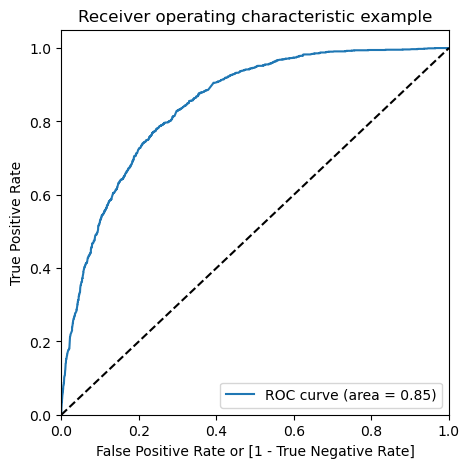

In [82]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [83]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x> i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.548982,1675,1,1,1,1,1,1,1,1,0,0,0,0
1,1,0.715807,4154,1,1,1,1,1,1,1,1,1,1,0,0
2,0,0.020427,5542,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.013817,3039,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0.749043,3671,1,1,1,1,1,1,1,1,1,1,0,0


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.268184  1.000000  0.000000
0.1   0.1  0.614181  0.951515  0.490561
0.2   0.2  0.712922  0.860606  0.658801
0.3   0.3  0.764527  0.771212  0.762077
0.4   0.4  0.786266  0.662879  0.831483
0.5   0.5  0.800284  0.546212  0.893393
0.6   0.6  0.796221  0.403030  0.940311
0.7   0.7  0.772653  0.215909  0.976680
0.8   0.8  0.739537  0.032576  0.998612
0.9   0.9  0.731816  0.000000  1.000000


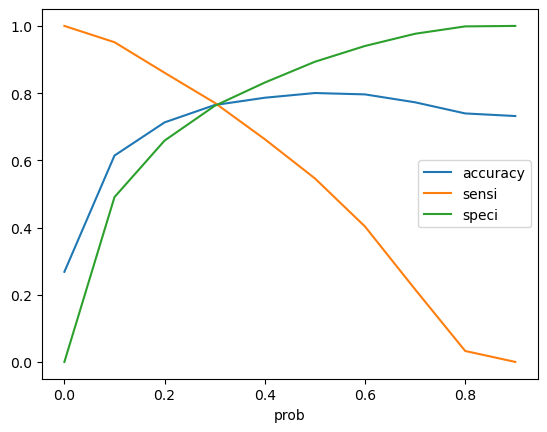

In [85]:
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

FRom above curve 0.3 is the optimum point ot take it as a cutoff probability

In [86]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,1,0.548982,1675,1,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.715807,4154,1,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.020427,5542,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.013817,3039,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.749043,3671,1,1,1,1,1,1,1,1,1,1,0,0,1


In [87]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_predicted)

0.7645266151970743

In [88]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Final_predicted )
confusion2

array([[2745,  857],
       [ 302, 1018]], dtype=int64)

In [89]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7712121212121212

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.7620766240977235

In [92]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23792337590227652


In [93]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5429333333333334


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9008861174926157


## Precision and Recall

In [95]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3218,  384],
       [ 599,  721]], dtype=int64)

##### Precision
TP / TP + FP

In [96]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6524886877828054

##### Recall
TP / TP + FN

In [97]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5462121212121213

In [98]:
from sklearn.metrics import precision_score, recall_score

In [99]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6524886877828054

In [100]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5462121212121213

In [101]:
from sklearn.metrics import precision_recall_curve

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

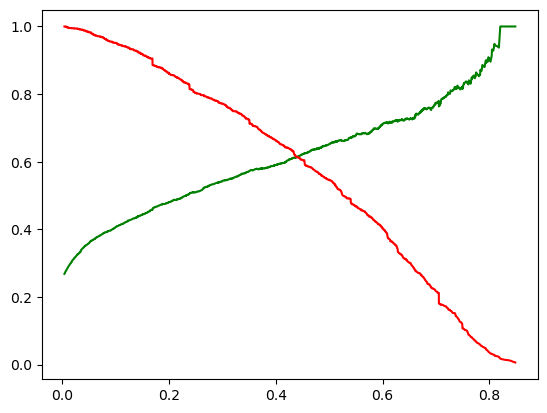

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [104]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [105]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
4460,-0.581288,0,0,0,1,1,0,0,0,1,0,0
733,1.616366,0,0,1,0,1,0,1,1,0,0,0
5514,-1.273143,1,0,0,0,0,0,0,1,0,0,0
5864,0.598933,0,0,1,0,0,1,0,0,0,0,0
916,-0.377802,1,0,0,0,1,0,0,1,0,0,0


In [106]:
X_test_sm = sm.add_constant(X_test)

In [107]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4460    0.368471
733     0.018180
5514    0.349089
5864    0.009830
916     0.340956
2464    0.749043
4635    0.012434
1722    0.115984
1848    0.026007
4364    0.017705
dtype: float64

In [108]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [109]:
y_test_df = pd.DataFrame(y_test)

In [110]:
y_test_df['CustID'] = y_test_df.index

In [111]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [112]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [113]:
y_pred_final.head()

,Churn,CustID,0
0,0,4460,0.368471
1,0,733,0.018180
2,0,5514,0.349089
3,0,5864,0.009830
4,0,916,0.340956


In [114]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [115]:
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [116]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,4460,0,0.368471
1,733,0,0.018180
2,5514,0,0.349089
3,5864,0,0.009830
4,916,0,0.340956


In [117]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [118]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,4460,0,0.368471,1
1,733,0,0.018180,0
2,5514,0,0.349089,1
3,5864,0,0.009830,0
4,916,0,0.340956,1


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7582938388625592

In [120]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1176,  385],
       [ 125,  424]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7723132969034608

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.7533632286995515